<font color='red'>Question 1.1:</font> What is deep learning?

Deep learning is a type of machine learning and artificial intelligence (AI) that imitates the way humans gain certain types of knowledge.Most deep learning methods use neural network architectures, which is why deep learning models are often referred to as deep neural networks.  Neural networks are designed to imitate how humans think and learn.

The term “deep” usually refers to the number of hidden layers in the neural network. Traditional neural networks only contain 2-3 hidden layers, while deep networks can have as many as 150.

Deep learning models are trained by using large sets of labeled data and neural network architectures that learn features directly from the data without the need for manual feature extraction.

<font color='red'>Question 1.2:</font> What is TensorFlow? What is Keras?

TensorFlow is an open-sourced end-to-end platform, a library for multiple machine learning tasks, while Keras is a high-level neural network library that runs on top of TensorFlow. Both provide high-level APIs used for easily building and training models, but Keras is more user-friendly because it's built-in Python.

In [2]:
pip install tensorflow

In [3]:
import keras

In [4]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils


In [5]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


<font color='red'>Question 1.3:</font> What is in mnist data? What is the sample size of train and test?

In [22]:
X_train.shape

(60000, 28, 28)

In [23]:
y_train.shape

(60000,)

In [24]:
X_test.shape

(10000, 28, 28)

In [25]:
y_test.shape

(10000,)

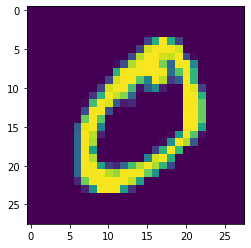

In [27]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1])

### Processing train and test data

In [5]:
### data normalization
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(type(X_train))

<class 'numpy.ndarray'>


In [6]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Build a deep learning model

In [7]:
# deep learning CNN model
model = Sequential()
model.add(Convolution2D(6, (3, 3), activation='relu', input_shape=X_train.shape[1:], data_format='channels_first'))
print(model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_first'))
print(model.output_shape)

model.add(Dropout(0.25))
print(model.output_shape)

model.add(Convolution2D(16, (3, 3), activation='relu', data_format='channels_first'))
print(model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_first'))
print(model.output_shape)

model.add(Dropout(0.25))
print(model.output_shape)

model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
print(model.output_shape)

model.add(Dense(10, activation='softmax'))
print(model.output_shape)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

(None, 6, 26, 26)
(None, 6, 13, 13)
(None, 6, 13, 13)
(None, 16, 11, 11)
(None, 16, 5, 5)
(None, 16, 5, 5)
(None, 400)
(None, 128)
(None, 128)
(None, 10)


2022-05-28 16:53:57.912033: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-28 16:53:57.912431: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 26, 26)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 13, 13)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 13, 13)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 11, 11)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 5, 5)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)              

<font color='red'>Question 1.4:</font> What are **Convolution2D, MaxPooling2D, Dropout, Dense**?


2D Convolutions are instrumental when creating convolutional neural networks or just for general image processing filters such as blurring, sharpening, edge detection, and many more. They are based on the idea of using a kernel and iterating through an input image to create an output image. 
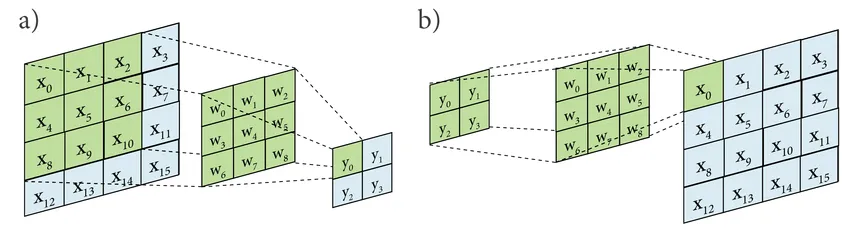

Max pooling is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.

This is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation.

Max pooling is done by applying a max filter to (usually) non-overlapping subregions of the initial representation.

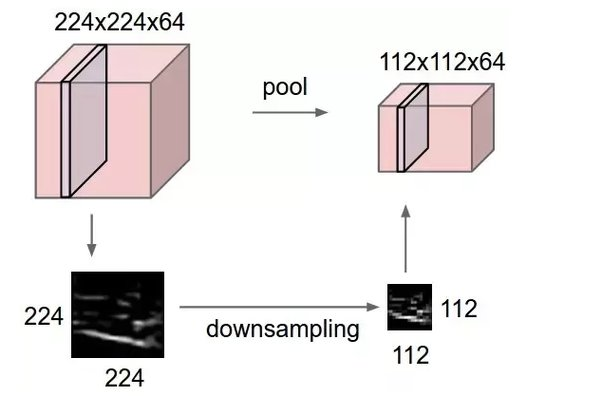

The term “dropout” refers to dropping out the nodes (input and hidden layer) in a neural network (as seen in Figure 1). All the forward and backwards connections with a dropped node are temporarily removed, thus creating a new network architecture out of the parent network. The nodes are dropped by a dropout probability of p.
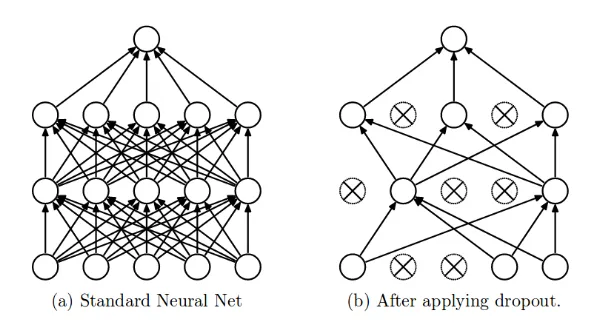

So by randomly dropping a few units (nodes), it forces the layers to take more or less responsibility for the input by taking a probabilistic approach.

This ensures that the model is getting generalised and hence reducing the overfitting problem.

In any neural network, a dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer. This layer is the most commonly used layer in artificial neural network networks.
The dense layer’s neuron in a model receives output from every neuron of its preceding layer, where neurons of the dense layer perform matrix-vector multiplication. Matrix vector multiplication is a procedure where the row vector of the output from the preceding layers is equal to the column vector of the dense layer. The general rule of matrix-vector multiplication is that the row vector must have as many columns like the column vector.

<font color='red'>Question 1.5:</font> What is **"Activation"**?

Simply put, an activation function is a function that is added into an artificial neural network in order to help the network learn complex patterns in the data. When comparing with a neuron-based model that is in our brains, the activation function is at the end deciding what is to be fired to the next neuron. That is exactly what an activation function does in an ANN as well. It takes in the output signal from the previous cell and converts it into some form that can be taken as input to the next cell. The comparison can be summarized in the figure below.
Activation Function decides whether a neuron should be activated or not. This means that it will decide whether the neuron's input to the network is important or not in the process of prediction using simpler mathematical operations.

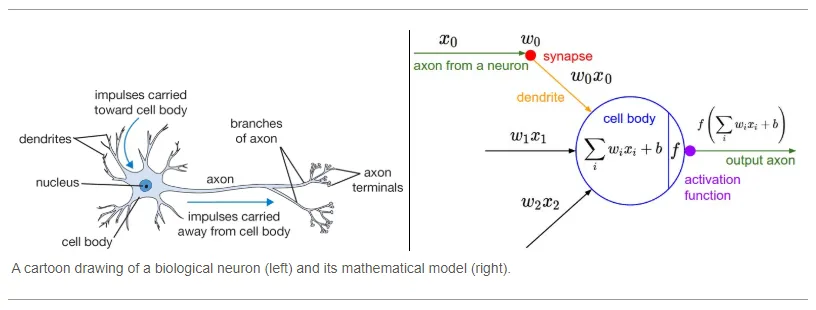

<font color='red'>Question 1.6:</font> What are the other options for **"optimizer"** and **"loss"**?

 **OPTIMIZERS**
 Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.
 1. Gradient Descent
Gradient Descent is the most basic but most used optimization algorithm. It’s used heavily in linear regression and classification algorithms. Backpropagation in neural networks also uses a gradient descent algorithm.

Gradient descent is a first-order optimization algorithm which is dependent on the first order derivative of a loss function. It calculates that which way the weights should be altered so that the function can reach a minima. Through backpropagation, the loss is transferred from one layer to another and the model’s parameters also known as weights are modified depending on the losses so that the loss can be minimized.

algorithm: θ=θ−α⋅∇J(θ)

2. Stochastic Gradient Descent
It’s a variant of Gradient Descent. It tries to update the model’s parameters more frequently. In this, the model parameters are altered after computation of loss on each training example. So, if the dataset contains 1000 rows SGD will update the model parameters 1000 times in one cycle of dataset instead of one time as in Gradient Descent.

θ=θ−α⋅∇J(θ;x(i);y(i)) , where {x(i) ,y(i)} are the training examples.

As the model parameters are frequently updated parameters have high variance and fluctuations in loss functions at different intensities.

3. Mini-Batch Gradient Descent
It’s best among all the variations of gradient descent algorithms. It is an improvement on both SGD and standard gradient descent. It updates the model parameters after every batch. So, the dataset is divided into various batches and after every batch, the parameters are updated.

θ=θ−α⋅∇J(θ; B(i)), where {B(i)} are the batches of training examples.

4. Momentum
Momentum was invented for reducing high variance in SGD and softens the convergence. It accelerates the convergence towards the relevant direction and reduces the fluctuation to the irrelevant direction. One more hyperparameter is used in this method known as momentum symbolized by ‘γ’.

V(t)=γV(t−1)+α.∇J(θ)

Now, the weights are updated by θ=θ−V(t).

The momentum term γ is usually set to 0.9 or a similar value.

5. Nesterov Accelerated Gradient
Momentum may be a good method but if the momentum is too high the algorithm may miss the local minima and may continue to rise up. So, to resolve this issue the NAG algorithm was developed. It is a look ahead method. We know we’ll be using γV(t−1) for modifying the weights so, θ−γV(t−1) approximately tells us the future location. Now, we’ll calculate the cost based on this future parameter rather than the current one.

V(t)=γV(t−1)+α. ∇J( θ−γV(t−1) ) and then update the parameters using θ=θ−V(t).

6. Adagrad
One of the disadvantages of all the optimizers explained is that the learning rate is constant for all parameters and for each cycle. This optimizer changes the learning rate. It changes the learning rate ‘η’ for each parameter and at every time step ‘t’. It’s a type second order optimization algorithm. It works on the derivative of an error function.

7. AdaDelta
It is an extension of AdaGrad which tends to remove the decaying learning Rate problem of it. Instead of accumulating all previously squared gradients, Adadelta limits the window of accumulated past gradients to some fixed size w. In this exponentially moving average is used rather than the sum of all the gradients.

8. Adam
Adam (Adaptive Moment Estimation) works with momentums of first and second order. The intuition behind the Adam is that we don’t want to roll so fast just because we can jump over the minimum, we want to decrease the velocity a little bit for a careful search. In addition to storing an exponentially decaying average of past squared gradients like AdaDelta, Adam also keeps an exponentially decaying average of past gradients M(t).

M(t) and V(t) are values of the first moment which is the Mean and the second moment which is the uncentered variance of the gradients respectively.



**LOSS FUNCTIONS**

1. Mean Squared Error
MSE loss is used for regression tasks. As the name suggests, this loss is calculated by taking the mean of squared differences between actual(target) and predicted values.

2. Binary Crossentropy
BCE loss is used for the binary classification tasks. If you are using BCE loss function, you just need one output node to classify the data into two classes. The output value should be passed through a sigmoid activation function and the range of output is (0 – 1).

3. Categorical Crossentropy
When we have a multi-class classification task, one of the loss function you can go ahead is this one. If you are using CCE loss function, there must be the same number of output nodes as the classes. And the final layer output should be passed through a softmax activation so that each node output a probability value between (0–1).

4. Sparse Categorical Crossentropy
This loss function is almost similar to CCE except for one change.

When we are using SCCE loss function, you do not need to one hot encode the target vector. If the target image is of a cat, you simply pass 0, otherwise 1. Basically, whichever the class is you just pass the index of that class.


The tf.keras.losses module contains the following built-in loss functions:
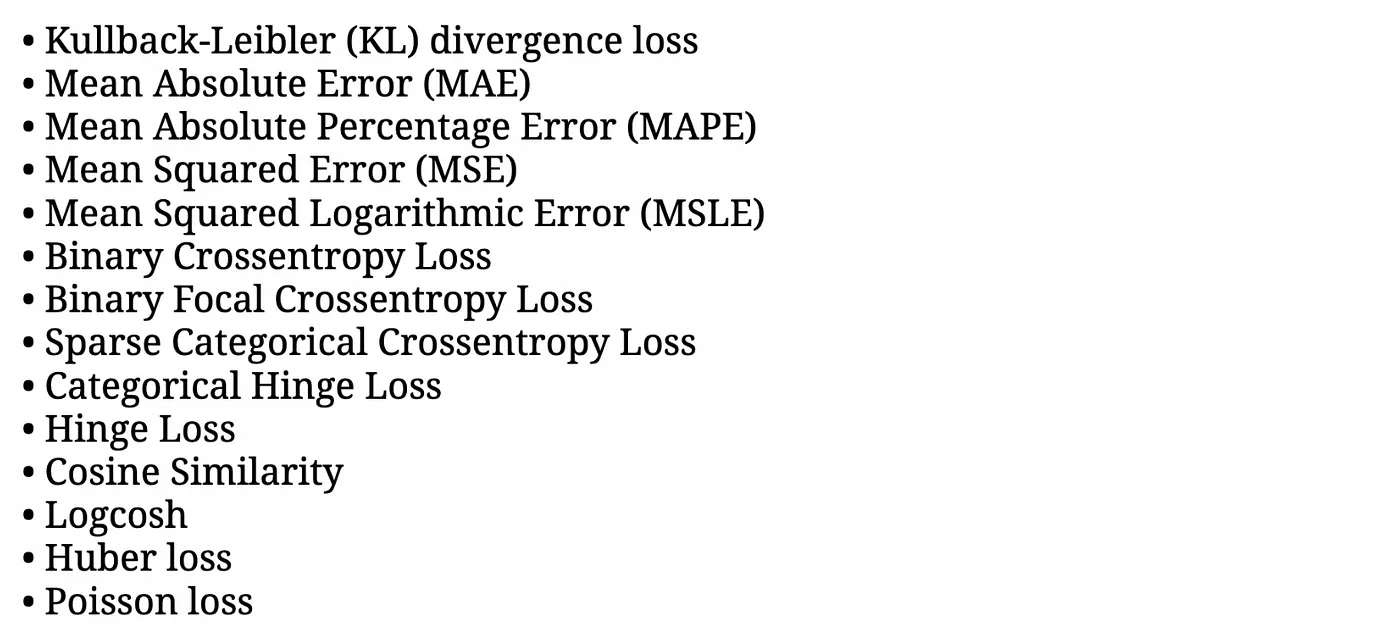

### Train the model

In [9]:
history_callback = model.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 40s 669us/step - loss: 0.4287 - accuracy: 0.8665
Epoch 2/5
60000/60000 [==============================] - 43s 714us/step - loss: 0.1928 - accuracy: 0.9404
Epoch 3/5
60000/60000 [==============================] - 42s 694us/step - loss: 0.1526 - accuracy: 0.9532
Epoch 4/5
60000/60000 [==============================] - 42s 703us/step - loss: 0.1345 - accuracy: 0.9584
Epoch 5/5
60000/60000 [==============================] - 46s 769us/step - loss: 0.1218 - accuracy: 0.9622


<font color='red'>Question 1.7:</font> What are **"batch_size"** and **"epochs"**?

The **batch_size** is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

The number of **epochs** is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

### Model evaluation and prediction

In [10]:
model.evaluate(X_train, Y_train, verbose=0)


[0.04363500685933978, 0.9872333407402039]

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[0.0432814779144479, 0.9860000014305115]

In [12]:
model.metrics_names

['loss', 'accuracy']

<AxesSubplot:>

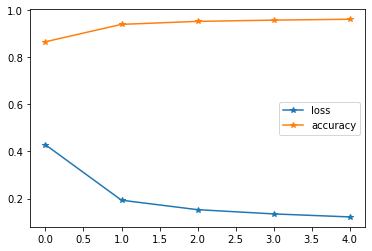

In [13]:
pd.DataFrame(history_callback.history).plot(marker='*')

In [14]:
model.predict_classes(X_test)

array([7, 2, 1, ..., 4, 5, 6])

<font color='red'>Question 1.8:</font> What information is in **"history_callback.history"**? What does the above graph tell us?

The history_callback.history attribute of fit() method is a dictionary containing the training loss and metrics values at successive epochs.

The keys in history_callback.history include the following:

loss: The training loss at each epoch.
val_loss: The validation loss at each epoch (if validation data was provided during training).

Any other metrics that were specified during training, such as accuracy or precision. These will also have a corresponding entry in the history_callback.history dictionary, with keys like accuracy and val_accuracy (if validation data was provided during training).

The above plot shows the learning curves of the neural network model during the training process. There is a steady decrease in loss after the first epoch. There is also a slight increase in accuracy. This indicates that the model is learning from data, but at a slower rate. For every epoch after this stage, there is a gradual change in loss and accuracy. 